In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("test_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [4]:
data.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


Como as colunas city_name e avg_precipitation possuem apenas 1 valor, podemos retirá-las, já que não vão ter nenhuma influência na previsão

In [5]:
data.nunique()



data2 = data.drop(['city_name', 'avg_precipitation'], axis=1)
test_data2 = test_data.drop(['city_name', 'avg_precipitation'], axis=1)

In [6]:
data.head(30)

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High
5,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,N101,N101,N101",2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,Medium
6,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,Low
7,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-14 23:00,DARK,16.0,1012.0,71.0,2.0,0.0,Sem Chuva,High
8,Guimaraes,UNDEFINED,1368,"N101,N101,N101,N101,N101,N101,N101,N101,N101,",2021-05-01 12:00,LIGHT,14.0,1017.0,67.0,5.0,0.0,Sem Chuva,Very_High
9,Guimaraes,MAJOR,10431,"N101,N101,N206,N105,N309,N309,N101,N101,IC5,N1...",2021-10-11 18:00,LIGHT,23.0,1018.0,40.0,0.0,0.0,Sem Chuva,Very_High


In [7]:
data2.isnull().sum()

magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_rain               0
incidents              0
dtype: int64

<AxesSubplot:>

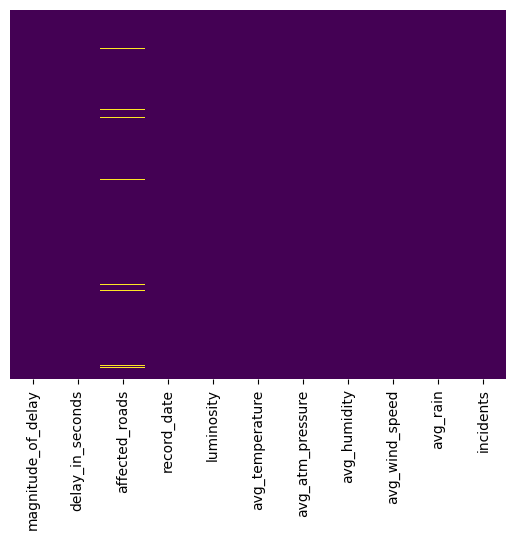

In [8]:
sns.heatmap(data2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

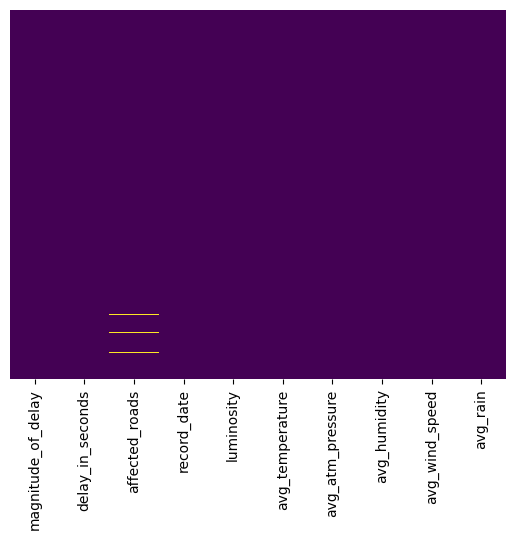

In [9]:
sns.heatmap(test_data2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
i = 0
data_roads = data2.copy()

#print(data2['affected_roads']).head(30)
all_roads = {}
for road_list in data_roads['affected_roads']:
    if type(road_list) == type(float(i)):
        #print("Iteração ::", i)
        data_roads.at[i, 'affected_roads'] = ","
    else: 
        road_list = str(road_list)
        if road_list != ",":
            roads = road_list.split(",")
            #print(roads)
            dic = {}
            
            for road in roads:
                #print(road)
                if road not in dic and road != "":
                    #print(road)
                    dic[road] = 0
                if road not in all_roads and road != "":
                    all_roads[road] = 0
            #data2['affected_roads'][i] = str(list(dic.keys()))
            data_roads.at[i, 'affected_roads'] = list(dic.keys())
            #print(list(dic.keys()))
    i = i + 1
print("Nº de estradas :: ", len(all_roads))
print("Estradas :: ", list(all_roads.keys()))


i = 0

test_data_roads = test_data2.copy()

#print(data2['affected_roads']).head(30)
all_roads_test = {}
for road_list in test_data_roads['affected_roads']:
    if type(road_list) == type(float(i)):
        #print("Iteração ::", i)
        test_data_roads.at[i, 'affected_roads'] = ","
    else: 
        road_list = str(road_list)
        if road_list != ",":
            roads = road_list.split(",")
            #print(roads)
            dic = {}
            
            for road in roads:
                #print(road)
                if road not in dic and road != "":
                    #print(road)
                    dic[road] = 0
                if road not in all_roads_test and road != "":
                    all_roads_test[road] = 0
            #data2['affected_roads'][i] = str(list(dic.keys()))
            test_data_roads.at[i, 'affected_roads'] = list(dic.keys())
            #print(list(dic.keys()))
    i = i + 1
print("Nº de estradas :: ", len(all_roads_test))
print("Estradas :: ", list(all_roads_test.keys()))



Nº de estradas ::  10
Estradas ::  ['N101', 'R206', 'N105', 'N206', 'N309', 'IC5', 'N310', 'N207-4', 'IC5 - N206', 'EM579']
Nº de estradas ::  10
Estradas ::  ['N101', 'R206', 'N105', 'N309', 'IC5', 'N206', 'EM579', 'N310', 'N101 - N310', 'N207-4']


In [11]:
data_roads.head(30)

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,[N101],2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,"[N101, R206, N105]",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,[N101],2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High
5,UNDEFINED,0,[N101],2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,[N101],2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low
7,UNDEFINED,0,[N101],2021-04-14 23:00,DARK,16.0,1012.0,71.0,2.0,Sem Chuva,High
8,UNDEFINED,1368,[N101],2021-05-01 12:00,LIGHT,14.0,1017.0,67.0,5.0,Sem Chuva,Very_High
9,MAJOR,10431,"[N101, N206, N105, N309, IC5]",2021-10-11 18:00,LIGHT,23.0,1018.0,40.0,0.0,Sem Chuva,Very_High


In [12]:
for road in all_roads:
    data_roads[road] = 0

for road in all_roads_test:
    test_data_roads[road] = 0
#data2.head(30)

In [13]:
test_data_roads.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,N101,R206,N105,N309,IC5,N206,EM579,N310,N101 - N310,N207-4
0,UNDEFINED,1211,[N101],2021-04-13 19:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0
1,UNDEFINED,0,[N101],2021-10-13 04:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0
2,UNDEFINED,0,[N101],2021-07-18 19:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0
3,UNDEFINED,140,"[N101, R206]",2021-10-30 15:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0
4,UNDEFINED,0,[N101],2021-10-18 10:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0


In [14]:
i = 0
for reg in data_roads:
    list = data_roads.at[i, 'affected_roads']
    for road in list:
        if road != ",":
            data_roads.at[i, road] = 1
    i = i + 1


i = 0
for reg in test_data_roads:
    list = test_data_roads.at[i, 'affected_roads']
    for road in list:
        if road != ",":
            test_data_roads.at[i, road] = 1
    i = i + 1

In [15]:
print(test_data_roads.columns)

Index(['magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_rain', 'N101', 'R206', 'N105',
       'N309', 'IC5', 'N206', 'EM579', 'N310', 'N101 - N310', 'N207-4'],
      dtype='object')


<AxesSubplot:>

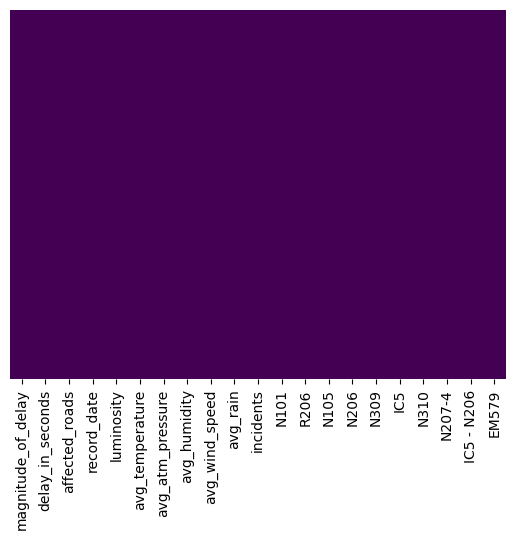

In [16]:
data3 = data_roads.dropna()
sns.heatmap(data_roads.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Como os valores dos incidentes, a nossa label, são categóricos, estes não poderão ser submetidos à maioria dos modelos de ML disponíveis. Assim, teremos de convertê-los para valores numéricos

In [17]:
replace_map = {'incidents' : {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High':4}}

data4 = data3.replace(replace_map)
data4.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,...,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,...,0,0,0,0,0,0,0,0,0,0
1,UNDEFINED,385,[N101],2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,...,1,0,0,0,0,0,0,0,0,0
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,...,0,0,0,0,0,0,0,0,0,0
3,MAJOR,2297,"[N101, R206, N105]",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,...,1,1,1,0,0,0,0,0,0,0
4,UNDEFINED,0,[N101],2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,...,1,0,0,0,0,0,0,0,0,0


Como podemos ver, agora o tipo do feature Incidents é numérico

In [18]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   object 
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      5000 non-null   object 
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_rain            5000 non-null   object 
 10  incidents           5000 non-null   int64  
 11  N101                5000 non-null   int64  
 12  R206                5000 non-null   int64  
 13  N105                5000 non-null   int64  
 14  N206                5000 non-null   int64  
 15  N309                5000 non-null   int64  
 16  IC5   

Agora vamos tratar das datas

In [19]:
data4['record_date'].head()

0    2021-03-15 23:00
1    2021-12-25 18:00
2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
Name: record_date, dtype: object

In [20]:
data4['record_date'] = pd.to_datetime(data4['record_date'], format = "%Y-%m-%d %H:%M", errors='coerce')
assert data4['record_date'].isnull().sum() == 0, 'missing record date'
data4['record_date'].head()

test_data_roads['record_date'] = pd.to_datetime(test_data_roads['record_date'], format = "%Y-%m-%d %H:%M", errors='coerce')

In [21]:
data4['record_date_year'] = data4['record_date'].dt.year
data4['record_date_month'] = data4['record_date'].dt.month
data4['record_date_day'] = data4['record_date'].dt.day
data4['record_date_hour'] = data4['record_date'].dt.hour
data4['record_date_minute'] = data4['record_date'].dt.minute

test_data_roads['record_date_year'] = test_data_roads['record_date'].dt.year
test_data_roads['record_date_month'] = test_data_roads['record_date'].dt.month
test_data_roads['record_date_day'] = test_data_roads['record_date'].dt.day
test_data_roads['record_date_hour'] = test_data_roads['record_date'].dt.hour
test_data_roads['record_date_minute'] = test_data_roads['record_date'].dt.minute


data4.head()
test_data_roads.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,...,N206,EM579,N310,N101 - N310,N207-4,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
0,UNDEFINED,1211,[N101],2021-04-13 19:00:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,...,0,0,0,0,0,2021,4,13,19,0
1,UNDEFINED,0,[N101],2021-10-13 04:00:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,...,0,0,0,0,0,2021,10,13,4,0
2,UNDEFINED,0,[N101],2021-07-18 19:00:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,...,0,0,0,0,0,2021,7,18,19,0
3,UNDEFINED,140,"[N101, R206]",2021-10-30 15:00:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,...,0,0,0,0,0,2021,10,30,15,0
4,UNDEFINED,0,[N101],2021-10-18 10:00:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,...,0,0,0,0,0,2021,10,18,10,0


In [22]:
#data4.nunique()

Aqui podemos verificar que o ano dos incidentes, bem como o minuto, são features com um único valor, sendo então essa informação inútil.

In [23]:
data5 = data4.drop(['record_date_minute','record_date_year', 'record_date', 'affected_roads'], axis = 1)
test_data3 = test_data_roads.drop(['record_date_minute','record_date_year', 'record_date', 'affected_roads'], axis = 1)
print(data5['magnitude_of_delay'].unique())
print(data5['luminosity'].unique())
print(data5['avg_rain'].unique())
#data5.info()

['UNDEFINED' 'MAJOR' 'MODERATE']
['DARK' 'LIGHT' 'LOW_LIGHT']
['Sem Chuva' 'chuva moderada' 'chuva fraca' 'chuva forte']


A 'magnitude_of_delay' tem 3 valores possíveis: UNDEFINED, MAJOR e MODERATE <br>
A luminosidade tem 3 valores possíveis: LIGHT, LOW_LIGHT, DARK <br>
A 'avg_rain' tem 4 valores possíveis: Sem Chuva, chuva moderada, chuva fraca, chuva forte <br>
Assim, teremos de transformar estes valores em valores numéricos, fazendo label enconding


In [24]:
replace_map = { 'magnitude_of_delay' : {'UNDEFINED': 0, 'MODERATE': 1, 'MAJOR': 2}, 
                'luminosity': {'DARK': 0, 'LIGHT': 1, 'LOW_LIGHT': 2},
                'avg_rain': {'Sem Chuva': 0, 'chuva moderada': 1, 'chuva fraca': 2, 'chuva forte': 3}
              }
data6 = data5.replace(replace_map)
test_data4 = test_data3.replace(replace_map)

data6.head()
test_data4.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,N101,R206,...,N309,IC5,N206,EM579,N310,N101 - N310,N207-4,record_date_month,record_date_day,record_date_hour
0,0,1211,1,15.0,1018.0,80.0,0.0,0,1,0,...,0,0,0,0,0,0,0,4,13,19
1,0,0,0,16.0,1018.0,41.0,2.0,0,1,0,...,0,0,0,0,0,0,0,10,13,4
2,0,0,1,22.0,1017.0,71.0,0.0,0,1,0,...,0,0,0,0,0,0,0,7,18,19
3,0,140,1,18.0,1008.0,81.0,3.0,0,1,1,...,0,0,0,0,0,0,0,10,30,15
4,0,0,1,20.0,1022.0,86.0,0.0,0,1,0,...,0,0,0,0,0,0,0,10,18,10


Depois de feita toda a etapa de feature engineering, vamos agora construir um modelo de regressão logística.

In [57]:
df = data6
df_test = test_data4

X = df.drop('incidents', axis=1)
y = df['incidents']
X_test = df_test

In [27]:
#from sklearn.model_selection import train_test_split
#X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=2022)

In [59]:
clf.fit(X, y)

RandomForestClassifier(n_estimators=200, random_state=2022)

In [60]:
predictions_dt = clf.predict(X_test)
predictions_dt

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- N101 - N310
Feature names seen at fit time, yet now missing:
- IC5 - N206

  warnings.warn(message, FutureWarning)


array([4, 0, 0, ..., 3, 1, 3])

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions_dt)

0.9126666666666666

In [61]:
#replace_map = {'incidents' : {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High':4}}

outcome = []
for i in range(len(predictions_dt)):
    if predictions_dt[i] == 0:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'None'})
    elif predictions_dt[i] == 1:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Low'})
    elif predictions_dt[i] == 2:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Medium'})
    elif predictions_dt[i] == 3:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'High'})
    elif predictions_dt[i] == 4:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Very_High'})
    
print(outcome)
od = pd.DataFrame(outcome)
od.to_csv("rf_out.csv", index=False,header=True)

[{'RowId': 1, 'Incidents': 'Very_High'}, {'RowId': 2, 'Incidents': 'None'}, {'RowId': 3, 'Incidents': 'None'}, {'RowId': 4, 'Incidents': 'Low'}, {'RowId': 5, 'Incidents': 'None'}, {'RowId': 6, 'Incidents': 'Very_High'}, {'RowId': 7, 'Incidents': 'Very_High'}, {'RowId': 8, 'Incidents': 'None'}, {'RowId': 9, 'Incidents': 'High'}, {'RowId': 10, 'Incidents': 'None'}, {'RowId': 11, 'Incidents': 'None'}, {'RowId': 12, 'Incidents': 'Very_High'}, {'RowId': 13, 'Incidents': 'High'}, {'RowId': 14, 'Incidents': 'High'}, {'RowId': 15, 'Incidents': 'None'}, {'RowId': 16, 'Incidents': 'High'}, {'RowId': 17, 'Incidents': 'Very_High'}, {'RowId': 18, 'Incidents': 'None'}, {'RowId': 19, 'Incidents': 'Low'}, {'RowId': 20, 'Incidents': 'High'}, {'RowId': 21, 'Incidents': 'None'}, {'RowId': 22, 'Incidents': 'Low'}, {'RowId': 23, 'Incidents': 'None'}, {'RowId': 24, 'Incidents': 'Low'}, {'RowId': 25, 'Incidents': 'High'}, {'RowId': 26, 'Incidents': 'High'}, {'RowId': 27, 'Incidents': 'None'}, {'RowId': 28, '